In [1]:
import numpy as np
from sklearn import datasets

iris_X, iris_y = datasets.load_iris(return_X_y=True)

np.unique(iris_y)

print(iris_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [2]:
indices = np.random.permutation(len(iris_X))
print("\n", indices)

iris_X_train = iris_X[indices[:-50]]
iris_y_train = iris_y[indices[:-50]]
iris_X_test = iris_X[indices[-50:]]
iris_y_test = iris_y[indices[-50:]]

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(iris_X_train, iris_y_train)  # trenowanie

knn.predict(iris_X_test)


 [ 78  39   7  26 144  47 111 138 116 147  33  11  66  54  14  49  67  32
 119  29  50 148  62   9  52   6 135  13  41  57 141  76  82 126 104 136
 106 145 143 137 129  98  36  71  96  94 118 117  55  60 130  86  95  77
  35 122  22  63  69  53   8  27  10  15  25 132  43 105 140 113 109 133
  75  16  45  42 115  51  64  31  68  30  38  92  48   4  81  91  46  58
  74 100  23  70   2  97 120 110  65 107 114  17 123   0 112  93 127   1
 128 108  99  85 102 134  12  28 131 146 139  61  84   5  79 101  83  90
  44  87  20  18 124  59  19  80  40  24 103  37  34  89   3 142  88  21
  72 125  73 149 121  56]


array([2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0,
       1, 2, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0,
       2, 2, 1, 2, 2, 1])

<AxesSubplot: >

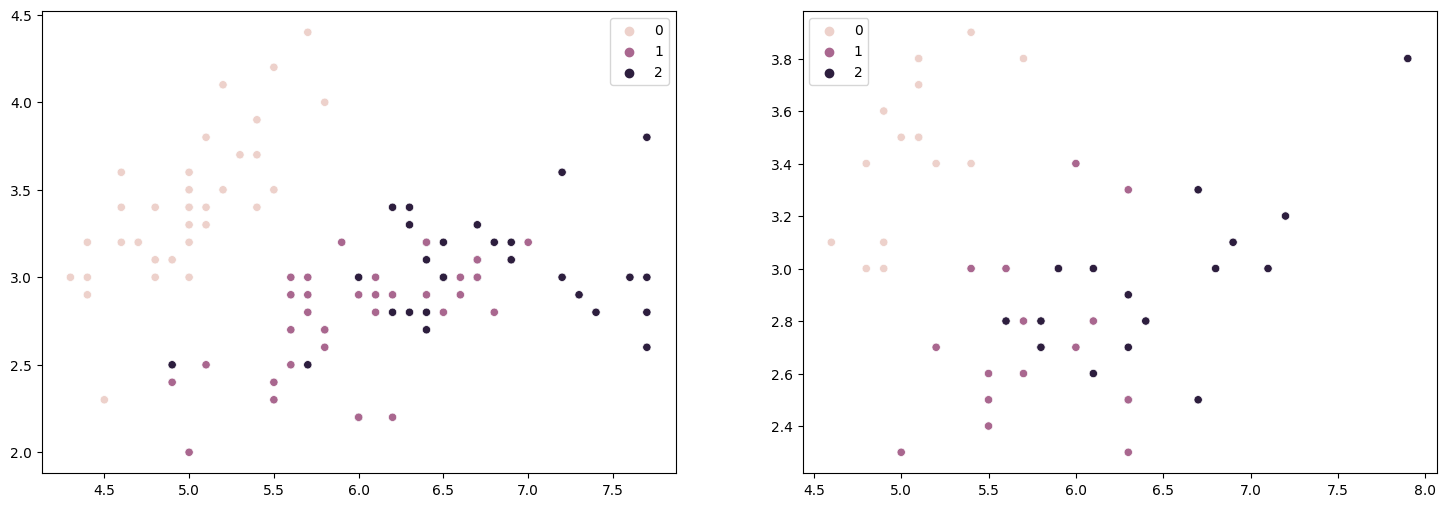

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 6))

# dane trenujace/uczace
plt.subplot(1, 2, 1)
sns.scatterplot(x=iris_X_train[:, 0], y=iris_X_train[:, 1], hue=iris_y_train)

# dane testowe
plt.subplot(1, 2, 2)
sns.scatterplot(x=iris_X_test[:, 0], y=iris_X_test[:, 1], hue=iris_y_test)


accuracy = 0.41333333333333333
matrix = [[50  0  0]
 [38 12  0]
 [13 37  0]]


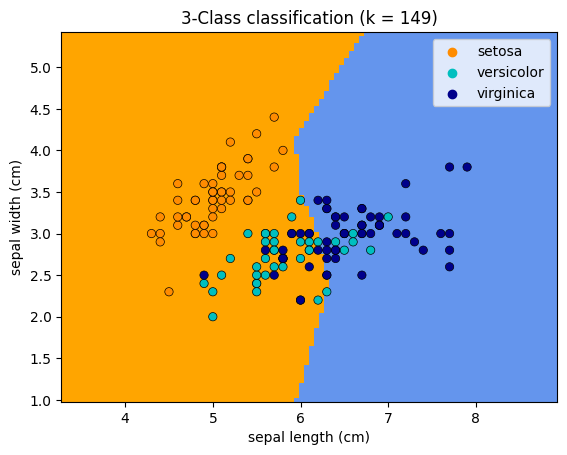

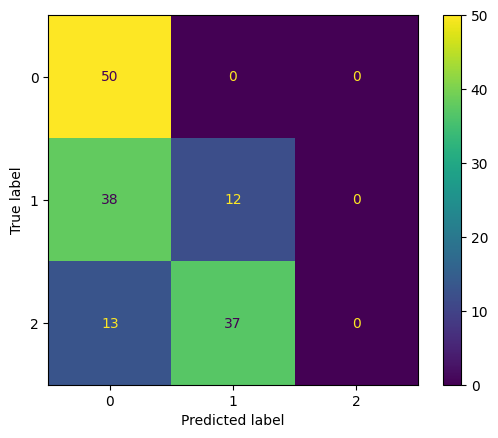

In [37]:
# zadanie - nanies zbiory uczce i testowe na jednym wykresie

from matplotlib.colors import ListedColormap

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target
n_neighbors = 149

clf = KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

display = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_light,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    shading="auto",
)

sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[y],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)

plt.title("3-Class classification (k = %i)" % (n_neighbors))

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy = {accuracy_score(y, clf.predict(X))}")
print(f"matrix = {confusion_matrix(y, clf.predict(X))}")

ConfusionMatrixDisplay.from_estimator(clf, X, y=y)

accuracy = 0.9266666666666666
matrix = [[50  0  0]
 [ 0 49  1]
 [ 0 10 40]]


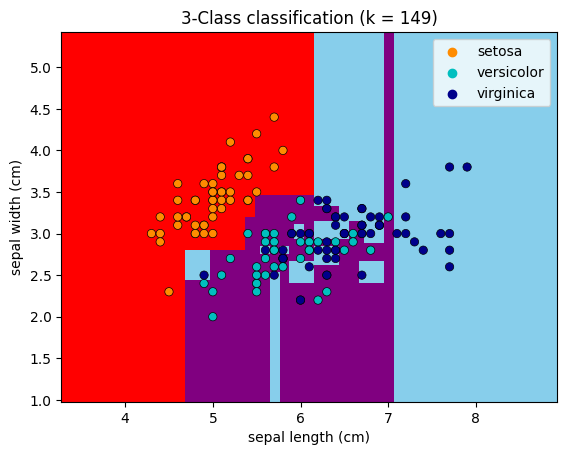

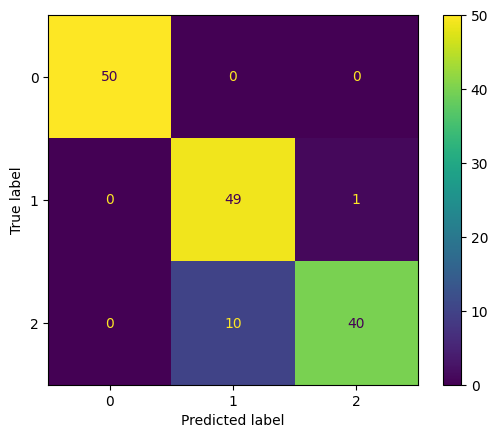

In [59]:
# drzewo rozpinajace

from sklearn.tree import DecisionTreeClassifier

from matplotlib.colors import ListedColormap

from sklearn.inspection import DecisionBoundaryDisplay

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

clf = DecisionTreeClassifier()
# clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(X, y)

cmap_light = ListedColormap(["red", "purple", "skyblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

display = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_light,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    shading="auto",
)

sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[y],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)

plt.title("3-Class classification (k = %i)" % (n_neighbors))

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy = {accuracy_score(y, clf.predict(X))}")
print(f"matrix = {confusion_matrix(y, clf.predict(X))}")

ConfusionMatrixDisplay.from_estimator(clf, X, y=y)


In [50]:
import graphviz
from sklearn import tree

# nie dziala na windows
# dot_data = tree.export_graphviz(clf, out_file=None)
# graph = graphviz.Source(dot_data)

# graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

accuracy = 0.8266666666666667
matrix = [[50  0  0]
 [ 0 38 12]
 [ 0 14 36]]


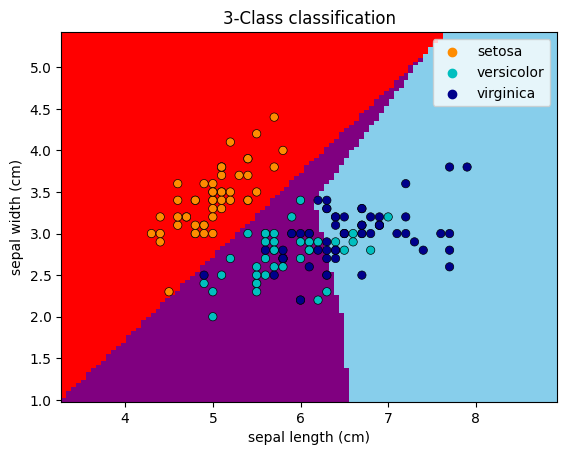

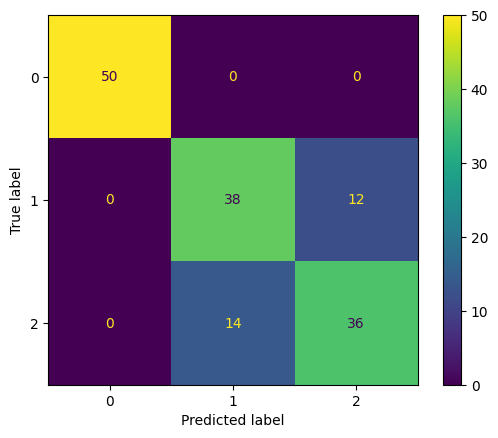

In [92]:
# neural networks

from sklearn.neural_network import MLPClassifier

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

clf = MLPClassifier(
    solver="adam",
    alpha=1e-4,
    hidden_layer_sizes=(5, 5),
    random_state=1,
    learning_rate_init=0.1
)
clf.fit(X, y)

cmap_light = ListedColormap(["red", "purple", "skyblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

display = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_light,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    shading="auto",
)

sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[y],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)

plt.title("3-Class classification")

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy = {accuracy_score(y, clf.predict(X))}")
print(f"matrix = {confusion_matrix(y, clf.predict(X))}")

ConfusionMatrixDisplay.from_estimator(clf, X, y=y)